# Flight Delay Prediction
## SMOTE to Handle Imbalance in ArrDel15
- <strong>Environment Setup:</strong> import libraries and load the dataset
- <strong>Imbalanced Data Analysis:</strong> understanding how the dataset balance is restored using random under sampling
- <strong>SMOTE:</strong> Creating synthetic data for the minority class using SMOTE(Synthetic Minority over-sampling Technique), takes random samples from the minority class, finds its nearest k neighbors, and then selects a point between the randomly selected data point and its nearest k neighbors to generate synthetic data
- <strong>Inference:</strong> understand how the model produces results and choosing the best classifier

## Environment Setup

In [1]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Imbalanced dataset helpers
from imblearn.over_sampling import SMOTE

df = pd.read_csv("Data/flight_and_weather_encoded.csv", index_col=0)

/home/admin/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Dataset Without Handling Imbalance

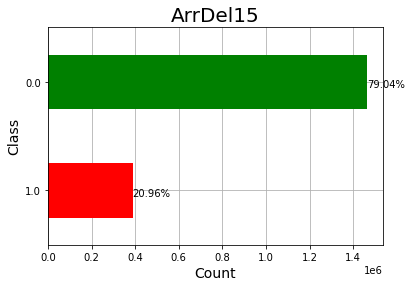

0.0    1463378
1.0     388058
Name: ArrDel15, dtype: int64


In [2]:
# Plotting the percentage of observations that fall under each class
ax = df["ArrDel15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["ArrDel15"].value_counts())
fig = ax.get_figure()
fig.savefig("Img/09_01_Dataset_ArrDel15_Class_Imbalance.png")

In [3]:
features = df.loc[:, df.columns != "ArrDel15"]
labels = np.asarray(df["ArrDel15"])
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
del features
del labels


Dataset shape: (1851436, 24)
features_train shape: (1481148, 23) | features_test shape: (370288, 23)
labels_train shape: (1481148,) | labels_test shape: (370288,)


## Training Data Without Handling Imbalance

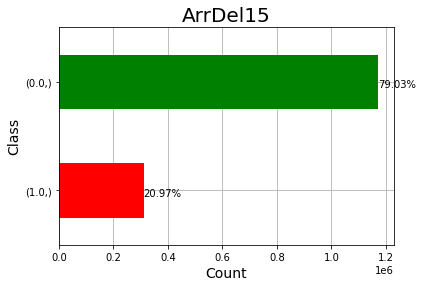

0.0    1170484
1.0     310664
dtype: int64


In [4]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/09_02_Training_ArrDel15_Class_Imbalance.png")

## SMOTE

In [5]:
# smote = SMOTE(random_state=42)
# features_train, labels_train = smote.fit_resample(features_train, labels_train)

In [6]:
# SMOTE takes too long - approx 47 minutes
# features_train.to_csv("./Data/smote_features_train.csv")
# pd.DataFrame(labels_train).to_csv("./Data/smote_labels_train.csv")
features_train = pd.read_csv("./Data/smote_features_train.csv", index_col=0)
labels_train = pd.read_csv("./Data/smote_labels_train.csv", index_col=0)
# labels_train.shape
labels_train = labels_train["0"].values

## Balancing the Training Data

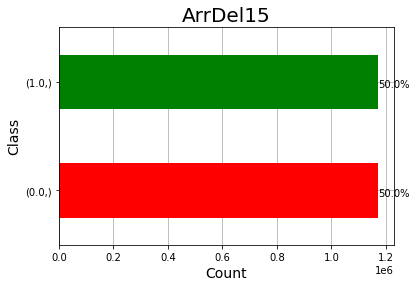

0.0    1170484
1.0    1170484
dtype: int64


In [7]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/09_03_SMOTE_Training_ArrDel15_Class.png")

### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    292894
         1.0       0.74      0.78      0.76     77394

    accuracy                           0.90    370288
   macro avg       0.84      0.85      0.85    370288
weighted avg       0.90      0.90      0.90    370288



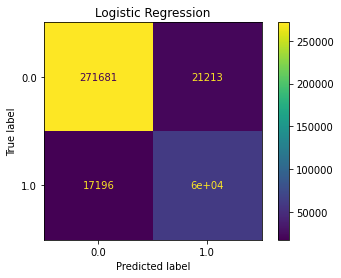

In [8]:
# model = LogisticRegression(n_jobs=-1)
# model.fit(features_train, labels_train)
# joblib.dump(model, "./SMOTE/LogisticRegression.joblib")
model = joblib.load("./SMOTE/LogisticRegression.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression")
print(conf_mat_plot)
plt.savefig("Img/09_04_SMOTE_LR_Confusion_Matrix")
del model
del model_pred

### Decision Tree Classifier

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91    292894
         1.0       0.66      0.71      0.68     77394

    accuracy                           0.86    370288
   macro avg       0.79      0.81      0.80    370288
weighted avg       0.87      0.86      0.86    370288



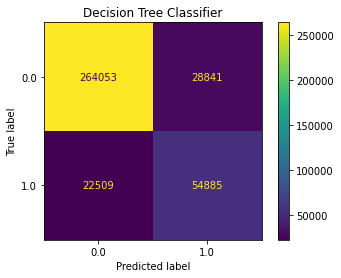

In [9]:
# model = DecisionTreeClassifier()
# model.fit(features_train, labels_train)
# joblib.dump(model, "./SMOTE/DecisionTreeClassifier.joblib")
model = joblib.load("./SMOTE/DecisionTreeClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier")
print(conf_mat_plot)
plt.savefig("Img/09_05_SMOTE_DTC_Confusion_Matrix")
del model
del model_pred

### Gradient Boosting Classifier

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    292894
         1.0       0.80      0.75      0.77     77394

    accuracy                           0.91    370288
   macro avg       0.87      0.85      0.86    370288
weighted avg       0.91      0.91      0.91    370288



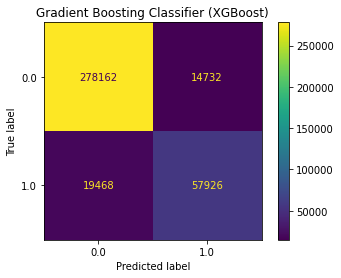

In [10]:
# model = GradientBoostingClassifier()
# model.fit(features_train, labels_train)
# joblib.dump(model, "./SMOTE/GradientBoostingClassifier.joblib")
model = joblib.load("./SMOTE/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost)")
print(conf_mat_plot)
plt.savefig("Img/09_06_SMOTE_GBC_Confusion_Matrix")
del model
del model_pred

### Random Forest

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    292894
         1.0       0.81      0.74      0.78     77394

    accuracy                           0.91    370288
   macro avg       0.87      0.85      0.86    370288
weighted avg       0.91      0.91      0.91    370288



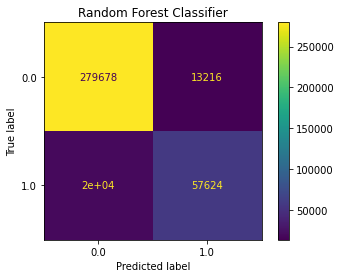

In [11]:
# model = RandomForestClassifier(n_jobs=-1)
# model.fit(features_train, labels_train)
# joblib.dump(model, "./SMOTE/RandomForestClassifier.joblib")
model = joblib.load("./SMOTE/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier")
print(conf_mat_plot)
plt.savefig("Img/09_07_SMOTE_RFC_Confusion_Matrix")
del model
del model_pred

### Extra Trees Classifier

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    292894
         1.0       0.77      0.76      0.76     77394

    accuracy                           0.90    370288
   macro avg       0.85      0.85      0.85    370288
weighted avg       0.90      0.90      0.90    370288



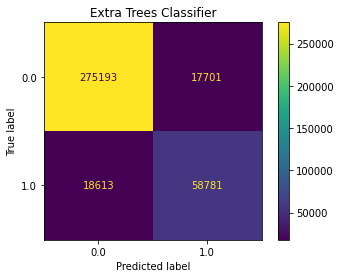

In [12]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
# joblib.dump(model, "./SMOTE/ExtraTreesClassifier.joblib")
# model = joblib.load("./SMOTE/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier")
print(conf_mat_plot)
plt.savefig("Img/09_08_SMOTE_ETC_Confusion_Matrix")

## Inference
<table>
    <thead>
        <tr>
            <th rowspan="3">Classification Model</th>
            <th colspan="8">Performance Metric</th>
        </tr>
        <tr>
            <th colspan="2">Precision</th>
            <th colspan="2">Recall</th>
            <th colspan="2">F1 Score</th>
            <th rowspan="2" colspan="2">Accuracy</th>
        </tr>
        <tr>
            <th>0.0</th>
            <th>1.0</th>
            <th>0.0</th>
            <th>1.0</th>
            <th>0.0</th>
            <th>1.0</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Logistic Regression</th>
            <td>0.94</td>
            <td>0.74</td>
            <td>0.93</td>
            <td>0.78</td>
            <td>0.93</td>
            <td>0.76</td>
            <td>0.90</td>
        </tr>
        <tr>
            <th>Decision Tree Classifier</th>
            <td>0.92</td>
            <td>0.66</td>
            <td>0.90</td>
            <td>0.71</td>
            <td>0.91</td>
            <td>0.68</td>
            <td>0.86</td>
        </tr>
        <tr>
            <th>Extra Trees Classifier</th>
            <td>0.94</td>
            <td>0.77</td>
            <td>0.94</td>
            <td>0.76</td>
            <td>0.94</td>
            <td>0.76</td>
            <td>0.90</td>
        </tr>
        <tr>
            <th>Gradient Boosting Classifier</th>
            <td>0.93</td>
            <td>0.80</td>
            <td>0.95</td>
            <td>0.75</td>
            <td>0.94</td>
            <td>0.77</td>
            <td>0.91</td>
        </tr>
        <tr>
            <th>Random Forest Classifier</th>
            <td>0.93</td>
            <td>0.81</td>
            <td>0.95</td>
            <td>0.74</td>
            <td>0.94</td>
            <td>0.78</td>
            <td>0.91</td>
        </tr>
    </tbody>
</table>